In [1]:
# For data handling
import pandas as pd
import numpy as np
# For plotting and visualization
import matplotlib.pyplot as plt
# For model building (linear regression)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('house_prices_dataset.csv')
print(df.head())

      area      price
0  2231.88  558852.17
1  2524.92  632260.29
2  1527.65  382994.25
3  1986.09  497607.86
4  2920.16  730870.84


In [3]:
x_train = df['area'][:70]    
y_train = df['price'][:70]
x_train_scaled = x_train / 1000
y_train_scaled = y_train / 1000
m = len(x_train)
iterations = 1000
learning_rate = 0.01

Text(0, 0.5, 'Price')

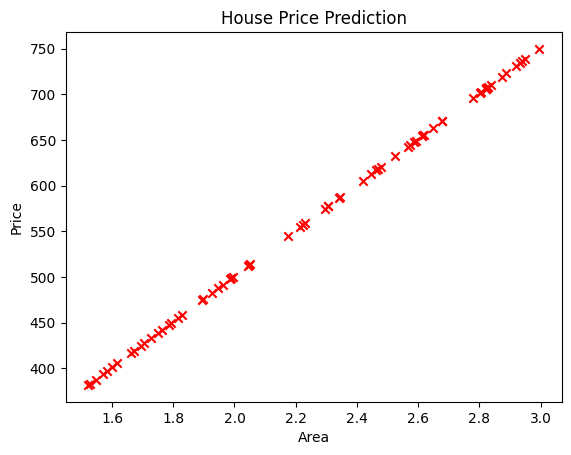

In [4]:
plt.scatter(x_train_scaled,y_train_scaled,marker='x',c='r')
plt.title("House Price Prediction".title())
plt.xlabel("Area")
plt.ylabel("Price")


In [5]:
def cost_function(x,y,w,b):
    cost=0
    m = 70
    for i in range(m):
        f_wb = w * x.iloc[i] + b
        cost = cost + (f_wb - y.iloc[i])**2
    return cost/(2*m)
        

In [6]:
def gradient (x,y,w,b):
    dj_dw = 0
    dj_db = 0
    m = 70
    for i in range(m):
        f_wb = w * x.iloc[i] + b
        dj_dw = dj_dw + (f_wb - y.iloc[i]) * x.iloc[i]
        dj_db = dj_db + (f_wb - y.iloc[i])
    dj_db = dj_db/m
    dj_dw = dj_dw/m
    return dj_dw, dj_db

In [7]:
def updating(x,y,w,b,learning_rate, iterations):
    for i in range (iterations):
        dj_dw,dj_db = gradient(x,y,w,b)
        tmp_w = w - learning_rate * dj_dw
        tmp_b = b - learning_rate * dj_db
        w = tmp_w
        b = tmp_b
    return w,b


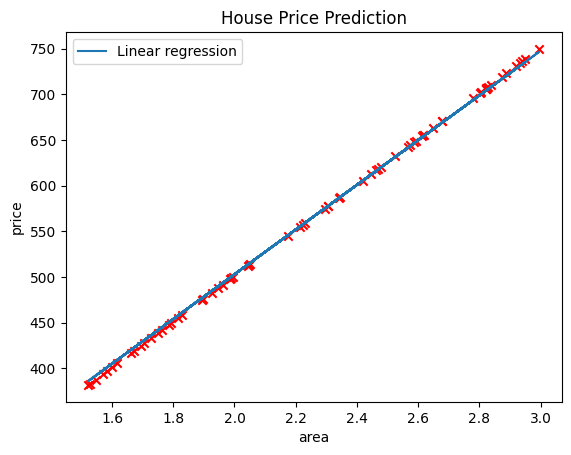

In [8]:
w,b = updating(x_train_scaled,y_train_scaled,0,0, 0.01, 6000)


# Plot final regression line
plt.scatter(x_train_scaled,y_train_scaled,marker='x',c='r')
plt.title("House Price Prediction".title())
plt.plot(x_train_scaled, w * x_train_scaled + b, label='Linear regression')
plt.xlabel("area")
plt.ylabel("price")
plt.legend()
plt.show()

In [9]:
x_test = df['area'][70:]
y_test = df['price'][70:]
x_test_scaled = x_test / 1000
y_test_scaled = y_test / 1000
y_hat = w * x_test_scaled + b


In [10]:

y_hat = y_hat.values if hasattr(y_hat, 'values') else y_hat
y_test_scaled = y_test_scaled.values if hasattr(y_test_scaled, 'values') else y_test_scaled

# Mean Squared Error (MSE)
mse = np.mean((y_hat - y_test_scaled) ** 2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_hat - y_test_scaled))

# R² Score
ss_total = np.sum((y_test_scaled - np.mean(y_test_scaled))**2)
ss_residual = np.sum((y_test_scaled - y_hat)**2)
r2 = 1 - (ss_residual / ss_total)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f} → Model explains {r2*100:.2f}% of the variance")

Test MSE: 5.7947
Test RMSE: 2.4072
Test MAE: 1.9325
R² Score: 0.9995 → Model explains 99.95% of the variance
